In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
# from google.colab import files

In [2]:
# files.upload()

In [3]:
from utils import mnist_reader
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.linear_model import LogisticRegression
#from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
seed = 1234
np.random.seed(seed)

In [4]:
#Documentation located at: https://github.com/zalandoresearch/fashion-mnist
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

In [5]:
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=seed, shuffle=True
)

In [6]:
# SuperXArr = np.concatenate((X_train, X_test), axis=0)
# SuperYArr = np.concatenate((y_train, y_test))

In [7]:
print(X_train.shape)
print(y_train.shape)
print("\n")
print(X_tr.shape) #75/25 test and valid split
print(y_tr.shape)
print("\n")
print(X_val.shape)
print(y_val.shape)
print("\n")
print(X_test.shape) # just test split
print(y_test.shape)

# print(SuperXArr.shape)

print(set(y_train))

(60000, 784)
(60000,)


(45000, 784)
(45000,)


(15000, 784)
(15000,)


(10000, 784)
(10000,)
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [59]:
%%capture LRFirst

LRModel = LogisticRegression(penalty='l1', solver='liblinear',n_jobs=-1, random_state=seed)
LRModel.fit(X_tr, y_tr)

print("done with LRFirst")


In [9]:
LRFirst.show()

done with LRFirst


/home/ubuntu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


First Model Accuracy Train ACC: 0.885 Validation ACC: 0.8416


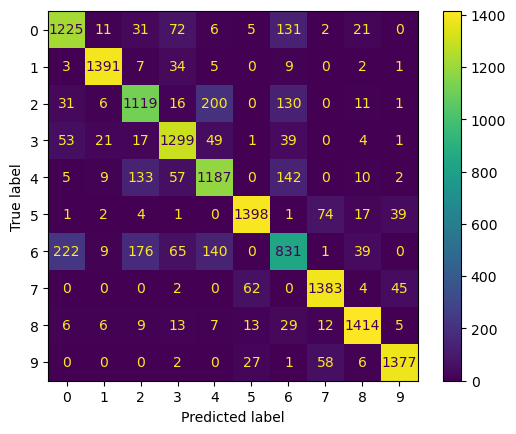

In [10]:
LRModelAccTrain = accuracy_score(LRModel.predict(X_tr),y_tr)
LRModelAccValid = accuracy_score(LRModel.predict(X_val),y_val)
print(f"First Model Accuracy Train ACC: {LRModelAccTrain} Validation ACC: {LRModelAccValid}")

# Evaluate confusion matrix using the sklearn function confusion_matrix
sklearn_cm = confusion_matrix(y_val, LRModel.predict(X_val))
sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = sklearn_cm)
sklearn_disp.plot();

In [11]:
# X_train1, y_train1 = mnist_reader.load_mnist('data/fashion', kind='train')
# X_test1, y_test1 = mnist_reader.load_mnist('data/fashion', kind='t10k')

In [12]:
# print(X_train1.shape)
# print(y_train1.shape)

# print(X_test1.shape)
# print(y_test1.shape)

In [13]:
# penaltyList = ['l1', 'l2']
# CList = [1, 10, 100]

LRModelList = list()

In [ ]:
# %%capture HUoutput

# for potentPenalty in penaltyList:
#     print(potentPenalty)
#     for potentC in CList:
#         tempLRModel = LogisticRegression(
#             penalty=potentPenalty, solver='liblinear', C = potentC
#         )

#         tempLRModel.fit(X_tr,y_tr)

#         LRModelList.append(tempLRModel)

# print("Done training")

In [15]:
%%capture LRmod10
tempLRModel0 = LogisticRegression(
            penalty='l1', solver='liblinear', C = 1,n_jobs=-1
        )

tempLRModel0.fit(X_tr,y_tr)

print("done")

# LRModelList.append(tempLRModel0)

In [16]:
LRmod10.show()

/home/ubuntu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


LogisticRegression(C=1, n_jobs=-1, penalty='l1', solver='liblinear')

In [17]:
LRModelList.append(tempLRModel0)

In [18]:
%%capture LRmod11
tempLRModel1 = LogisticRegression(
            penalty='l1', solver='liblinear', C = 10,n_jobs=-1
        )

tempLRModel1.fit(X_tr,y_tr)

print("done")

LRModelList.append(tempLRModel1)

In [ ]:
LRmod11.show()

In [20]:
%%capture LRmod12
tempLRModel2 = LogisticRegression(
            penalty='l1', solver='liblinear', C = 100,n_jobs=-1
        )

tempLRModel2.fit(X_tr,y_tr)

print("done")


LRModelList.append(tempLRModel2)

In [21]:
LRmod12.show()

done


/home/ubuntu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


In [ ]:
%%capture LRmod13
tempLRModel3 = LogisticRegression(
            penalty='l2', solver='liblinear', C = 1,n_jobs=-1
        )

tempLRModel3.fit(X_tr,y_tr)

print("done")


LRModelList.append(tempLRModel3)

In [29]:
LRmod13.show()

done


/home/ubuntu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(
/home/ubuntu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
%%capture LRmod14
tempLRModel4 = LogisticRegression(
            penalty='l2', solver='liblinear', C = 10,n_jobs=-1
        )

tempLRModel4.fit(X_tr,y_tr)

print("done")


LRModelList.append(tempLRModel4)

In [30]:
LRmod14.show()

done


/home/ubuntu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(
/home/ubuntu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
%%capture LRmod15
tempLRModel5 = LogisticRegression(
            penalty='l2', solver='liblinear', C = 100,n_jobs=-1
        )

tempLRModel5.fit(X_tr,y_tr)

print("done")


LRModelList.append(tempLRModel5)

In [31]:
LRmod15.show()

done


/home/ubuntu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(
/home/ubuntu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [38]:
print(len(LRModelList))

6


In [40]:
for amodel in LRModelList:
    tempModTrainAcc = accuracy_score(amodel.predict(X_tr),y_tr)
    tempModTestAcc = accuracy_score(amodel.predict(X_val),y_val)

    print(f"The Train ACC: {tempModTrainAcc} Val ACC: {tempModTestAcc}")

The Train ACC: 0.8849777777777778 Val ACC: 0.8417333333333333
The Train ACC: 0.8851111111111111 Val ACC: 0.8394
The Train ACC: 0.8852 Val ACC: 0.8395333333333334
The Train ACC: 0.8832 Val ACC: 0.8402
The Train ACC: 0.8840444444444444 Val ACC: 0.8406666666666667
The Train ACC: 0.8844666666666666 Val ACC: 0.8401333333333333


In [37]:
# observed that regularization strength set 1 one is best for l1 
# l1 has a .001 gap on every one else (largest l1)
# going to use base case 0 for validation set to try  and test

In [41]:
testList = list()

In [43]:
%%capture LRmod10
tempLRModelTest = LogisticRegression(
            penalty='l1', solver='saga', C = 1, n_jobs=-1
        )

tempLRModelTest.fit(X_tr,y_tr)

print("done")

# LRModelList.append(tempLRModel0)

In [45]:
LRmod10.show()

done


/home/ubuntu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [44]:
testModTrainAcc = accuracy_score(tempLRModelTest.predict(X_tr),y_tr)
testModValAcc = accuracy_score(tempLRModelTest.predict(X_val),y_val)

print(f"The Train ACC: {testModTrainAcc} Val ACC: {testModValAcc}")

The Train ACC: 0.8809333333333333 Val ACC: 0.8440666666666666


In [ ]:
#changed to saga and .003 increase??? holy

In [46]:
%%capture LRmod99
LRModel99 = LogisticRegression(
            penalty='l1', solver='saga', C = 1, n_jobs=-1, random_state=seed
        )

LRModel99.fit(X_tr,y_tr)

LRModel98 = LogisticRegression(
            penalty='l1', solver='saga', C = 10, n_jobs=-1, random_state=seed
        )

LRModel98.fit(X_tr,y_tr)

LRModel97 = LogisticRegression(
            penalty='l1', solver='saga', C = 100, n_jobs=-1, random_state=seed
        )

LRModel97.fit(X_tr,y_tr)

testList.append(LRModel99)
testList.append(LRModel98)
testList.append(LRModel97)


print("done")

# LRModelList.append(tempLRModel0)

In [47]:
LRmod99.show()

done


/home/ubuntu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ubuntu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ubuntu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [48]:
for amodel in testList:
    tempModTrainAcc = accuracy_score(amodel.predict(X_tr),y_tr)
    tempModValAcc = accuracy_score(amodel.predict(X_val),y_val)
    tempModTestAcc = accuracy_score(amodel.predict(X_test),y_test)
    
    print(f"The Train ACC: {tempModTrainAcc} Val ACC: {tempModValAcc} Test ACC: {tempModTestAcc}")

The Train ACC: 0.8808666666666667 Val ACC: 0.8439333333333333 Test ACC: 0.8357
The Train ACC: 0.8808666666666667 Val ACC: 0.8439333333333333 Test ACC: 0.8357
The Train ACC: 0.8808444444444444 Val ACC: 0.8439333333333333 Test ACC: 0.8357


In [50]:
ActualList = list()

In [49]:
%%capture LRmod98
LRModel96 = LogisticRegression(
            penalty='l1', solver='saga', C = 1, n_jobs=-1, random_state=seed
        )

LRModel96.fit(X_tr,y_tr)

LRModel95 = LogisticRegression(
            penalty='l1', solver='saga', C = 5, n_jobs=-1, random_state=seed
        )

LRModel95.fit(X_tr,y_tr)

LRModel94 = LogisticRegression(
            penalty='l1', solver='saga', C = 10, n_jobs=-1, random_state=seed
        )

LRModel94.fit(X_tr,y_tr)

LRModel93 = LogisticRegression(
            penalty='l1', solver='saga', C = 20, n_jobs=-1, random_state=seed
        )

LRModel93.fit(X_tr,y_tr)

LRModel92 = LogisticRegression(
            penalty='l1', solver='saga', C = 50, n_jobs=-1, random_state=seed
        )

LRModel92.fit(X_tr,y_tr)

LRModel91 = LogisticRegression(
            penalty='l1', solver='saga', C = 100, n_jobs=-1, random_state=seed
        )

LRModel91.fit(X_tr,y_tr)

ActualList.append(LRModel96)
ActualList.append(LRModel95)
ActualList.append(LRModel94)
ActualList.append(LRModel93)
ActualList.append(LRModel92)
ActualList.append(LRModel91)

print("done")

# LRModelList.append(tempLRModel0)

NameError: name 'ActualList' is not defined

In [51]:
ActualList.append(LRModel96)
ActualList.append(LRModel95)
ActualList.append(LRModel94)
ActualList.append(LRModel93)
ActualList.append(LRModel92)
ActualList.append(LRModel91)

In [53]:
print(len(ActualList))

6


In [52]:
LRmod98.show()

/home/ubuntu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ubuntu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ubuntu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ubuntu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ubuntu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home

In [54]:
for amodel in ActualList:
    tempModTrainAcc = accuracy_score(amodel.predict(X_tr),y_tr)
    tempModValAcc = accuracy_score(amodel.predict(X_val),y_val)
    tempModTestAcc = accuracy_score(amodel.predict(X_test),y_test)
    
    print(f"The Train ACC: {tempModTrainAcc} Val ACC: {tempModValAcc} Test ACC: {tempModTestAcc}")

The Train ACC: 0.8808666666666667 Val ACC: 0.8439333333333333 Test ACC: 0.8357
The Train ACC: 0.8808666666666667 Val ACC: 0.8439333333333333 Test ACC: 0.8357
The Train ACC: 0.8808666666666667 Val ACC: 0.8439333333333333 Test ACC: 0.8357
The Train ACC: 0.8808666666666667 Val ACC: 0.8439333333333333 Test ACC: 0.8357
The Train ACC: 0.8808444444444444 Val ACC: 0.8439333333333333 Test ACC: 0.8357
The Train ACC: 0.8808444444444444 Val ACC: 0.8439333333333333 Test ACC: 0.8357


In [55]:
%%capture LRmod97
LRModel90 = LogisticRegression(
            penalty='l2', solver='saga', C = 1, n_jobs=-1, random_state=seed
        )

LRModel90.fit(X_tr,y_tr)

LRModel89 = LogisticRegression(
            penalty='l2', solver='saga', C = 5, n_jobs=-1, random_state=seed
        )

LRModel89.fit(X_tr,y_tr)

LRModel88 = LogisticRegression(
            penalty='l2', solver='saga', C = 10, n_jobs=-1, random_state=seed
        )

LRModel88.fit(X_tr,y_tr)

LRModel87 = LogisticRegression(
            penalty='l2', solver='saga', C = 20, n_jobs=-1, random_state=seed
        )

LRModel87.fit(X_tr,y_tr)

LRModel86 = LogisticRegression(
            penalty='l2', solver='saga', C = 50, n_jobs=-1, random_state=seed
        )

LRModel86.fit(X_tr,y_tr)

LRModel85 = LogisticRegression(
            penalty='l2', solver='saga', C = 100, n_jobs=-1, random_state=seed
        )

LRModel85.fit(X_tr,y_tr)

print("done")

# LRModelList.append(tempLRModel0)

In [56]:
LRmod97.show()

done


/home/ubuntu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ubuntu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ubuntu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ubuntu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ubuntu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home

In [57]:
ActualList.append(LRModel90)
ActualList.append(LRModel89)
ActualList.append(LRModel88)
ActualList.append(LRModel87)
ActualList.append(LRModel86)
ActualList.append(LRModel85)

In [58]:
for amodel in ActualList:
    tempModTrainAcc = accuracy_score(amodel.predict(X_tr),y_tr)
    tempModValAcc = accuracy_score(amodel.predict(X_val),y_val)
    tempModTestAcc = accuracy_score(amodel.predict(X_test),y_test)
    
    print(f"The Train ACC: {tempModTrainAcc} Val ACC: {tempModValAcc} Test ACC: {tempModTestAcc}")

The Train ACC: 0.8808666666666667 Val ACC: 0.8439333333333333 Test ACC: 0.8357
The Train ACC: 0.8808666666666667 Val ACC: 0.8439333333333333 Test ACC: 0.8357
The Train ACC: 0.8808666666666667 Val ACC: 0.8439333333333333 Test ACC: 0.8357
The Train ACC: 0.8808666666666667 Val ACC: 0.8439333333333333 Test ACC: 0.8357
The Train ACC: 0.8808444444444444 Val ACC: 0.8439333333333333 Test ACC: 0.8357
The Train ACC: 0.8808444444444444 Val ACC: 0.8439333333333333 Test ACC: 0.8357
The Train ACC: 0.8808444444444444 Val ACC: 0.8439333333333333 Test ACC: 0.8357
The Train ACC: 0.8808444444444444 Val ACC: 0.8439333333333333 Test ACC: 0.8357
The Train ACC: 0.8808444444444444 Val ACC: 0.8439333333333333 Test ACC: 0.8357
The Train ACC: 0.8808444444444444 Val ACC: 0.8439333333333333 Test ACC: 0.8357
The Train ACC: 0.8808444444444444 Val ACC: 0.8439333333333333 Test ACC: 0.8357
The Train ACC: 0.8808444444444444 Val ACC: 0.8439333333333333 Test ACC: 0.8357


In [ ]:
#plot accuracies vs value of C